In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape
data.describe()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Checking NaN values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

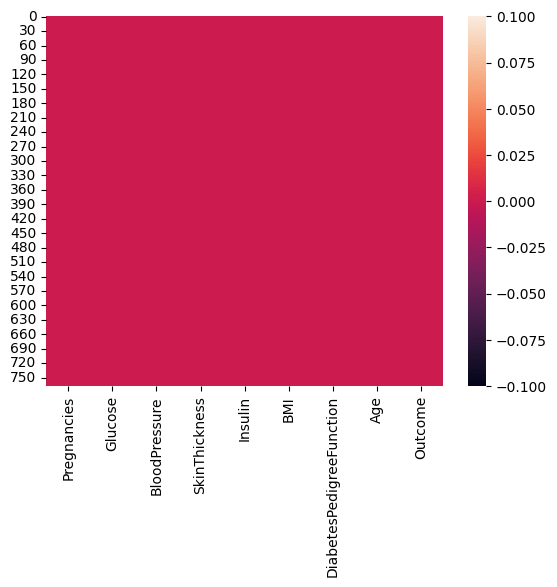

In [7]:
sns.heatmap(data.isnull());

In [8]:
# finding correlation..
correlation =data.corr()
correlation.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548


<Axes: >

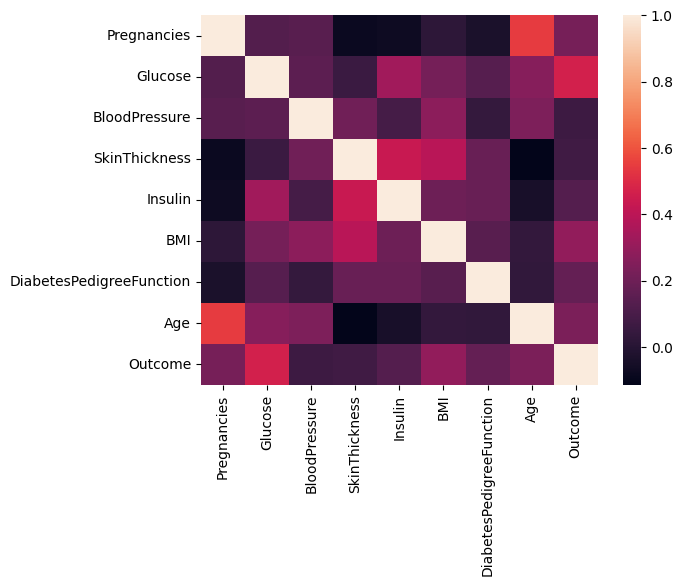

In [9]:
sns.heatmap(correlation)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
X = data.drop("Outcome", axis=1)  # Feature Matrix
y = data['Outcome']               # Target Vector

In [12]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [13]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [14]:
# Now splitting data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
len(X_test) + len(X_train) == len(data)  # checking whether our data splits correctly or not..

True

In [16]:
# Training the Model using LogisticRegression

model = model = LogisticRegression(max_iter=1000)  # adjust the number of iteration based on your needs
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
X_pred = model.predict(X_test)
X_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
accuracy_score(X_pred, y_test)

0.8051948051948052

In [33]:
!where python

C:\ProgramData\anaconda3\python.exe
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\python.exe


In [32]:
# Check Django Installation
!python -m django --version

4.1


In [31]:
# python version
!python --version

Python 3.11.3


In [35]:
# !venv\Scripts\activate

In [49]:
# import sys
# sys.executable

# !jupyter kernelspec list


In [38]:
import platform
platform.python_version()

'3.11.3'

In [39]:
!jupyter --config-dir

C:\Users\lenovo\.jupyter


In [40]:
%conda list
# or
%pip list


# packages in environment at C:\ProgramData\anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2023.07                 py311_0  
abseil-cpp                20211102.0           hd77b12b_0  
aiobotocore               2.4.2           py311haa95532_0  
aiofiles                  22.1.0          py311haa95532_0  
aiohttp                   3.8.3           py311h2bbff1b_0  
aioitertools              0.7.1              pyhd3eb1b0_0  
aiosignal                 1.2.0              pyhd3eb1b0_0  
aiosqlite                 0.18.0          py311haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda-catalogs         0.2.0           py311haa95532_0  
anaconda-client           1.11.3          py311haa95532_0  
anaconda-navigator        2.4.2           py311haa95532_0  
anaconda-project          0.11.1          py311haa95532_0  
anyio                     3.5.0           py311haa95532_0  
appdirs                   1.4.4     

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.5.2
astroid                       2.14.2
astropy                       5.1
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         23.1.0
Automat  